In [22]:
%load_ext autoreload
%autoreload 2

from context import uncertify

In [23]:
import logging
from uncertify.log import setup_logging
setup_logging()
LOG = logging.getLogger(__name__)

# Matplotlib DEBUG logging spits out a whole bunch of crap
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [24]:
import torch
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [ ]:
def kl_divergence(p, q):
    return np.mean(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
x = np.arange(-10, 10, 0.5)
p = norm.pdf(x, 0, 1)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p, '.')
plt.plot(x, q, '.', c='red')

In [ ]:
np.where(p != 0, p * np.log(p / q), 0)

In [ ]:
p/q

In [ ]:
p

In [ ]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
a/b

In [ ]:
a*b

In [ ]:
np.log(a)

In [ ]:
import torch

In [ ]:
t = torch.Tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
t

In [ ]:
t.shape

In [ ]:
t.mean(dim=2)

In [ ]:
mu = t
log_var = t

In [ ]:
torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1), dim=0)

In [ ]:
1 + log_var - mu ** 2 - log_var.exp()

In [ ]:
torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1)

In [ ]:
torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1), dim=0) 

In [ ]:
torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

In [ ]:
1 + log_var - mu.pow(2) - log_var.exp()

In [ ]:
import numpy as np
prediction = np.ones((2, 3))
ground_truth = np.ones((2, 3))

res = np.sum(np.multiply(prediction.flatten(), ground_truth.flatten()))

In [ ]:
type(res)

In [ ]:
import torch
x = torch.randn(2, 2, dtype=torch.double)

In [ ]:
torch.where(x>0, torch.Tensor(1), torch.Tensor(0))

In [ ]:
type(torch.where(x>0)[0])

In [ ]:
torch.where(x > 0, x, 0.)

In [ ]:
torch.Tensor(torch.where(x>0))

In [ ]:
x = torch.randn(3, 2)
z = torch.zeros_like(x)
o = torch.ones_like(x)
x

In [ ]:
torch.where(x > 0, o, z)

In [ ]:
torch.Tensor.zero_like(x)

In [ ]:
from uncertify.visualization.histograms import plot_pixel_histogram

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plot_pixel_histogram([x1, x2, x3], bins=30, axis='on');

In [ ]:
from sklearn import metrics
import scikitplot as skplt

In [ ]:
y_true = [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]

cm = metrics.confusion_matrix(y_true, y_pred)
skplt.metrics.plot_confusion_matrix(y_true, y_pred)

In [ ]:
import numpy as np
cm = np.add(cm, np.array([[1, 1], [1, 1]]))

In [ ]:
cm

In [ ]:
cm +=  np.array([[1, 1], [1, 1]])

In [ ]:
cm

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7])

In [ ]:
np.append(a, b)

In [ ]:
a

In [ ]:
b

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

array = np.random.rand((30)).reshape(-1, 1)
array

In [ ]:
kde = KernelDensity(bandwidth=0.2, kernel='gaussian')
kde.fit(array)

In [ ]:
x_d = np.linspace(-3, 3, 1000)

In [ ]:
logprob = kde.score_samples(x_d[:, None])

In [ ]:
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(array, np.full_like(array, -0.01), '|k', markeredgewidth=1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 64)
y = np.cos(x) 

pl.figure()
pl.plot(x,y)

n = 20
colors = plt.cm.jet(np.linspace(0,1,n))

for i in range(n):
    pl.plot(x, i*y, color=colors[i])

In [ ]:
torch.ones((128, ))

In [ ]:
torch.normal(mean=0, std=torch.ones((10, 128, )))

In [ ]:
n_latent_samples = 16
latent_space_dim = 128
latent_samples = torch.normal(mean=0, std=torch.ones((n_latent_samples, latent_space_dim, )))

In [ ]:
latent_samples.shape

In [ ]:
def get_conv2d_out_size(i, p, k, d, s):
    return (i + 2*p - k - (k-1)*(d-1))/s + 1

In [ ]:
from uncertify.models.utils import conv2d_output_shape, convtransp2d_output_shape

In [ ]:
conv2d_output_shape(8, 1, 1, 0)

In [ ]:
convtransp2d_output_shape(8, 5, 2, 2, 1, 1)

In [ ]:
convtransp2d_output_shape(64, 5, 2, 2, 1, 1)

In [ ]:
from dataclasses import dataclass
from dataclasses import asdict

from typing import List

@dataclass
class Point:
    x: int
    y: int

@dataclass
class C:
     mylist: List[Point]

p = Point(10, 20)
assert asdict(p) == {'x': 10, 'y': 20}

c = C([Point(0, 0), Point(10, 4)])
c


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(range(10), range(10))

In [ ]:
cycle_size = 10

In [ ]:
frac = 0.25

In [ ]:
int(cycle_size - cycle_size * frac)

In [ ]:
from math import floor, ceil

In [ ]:
floor(cycle_size - cycle_size * frac)

In [ ]:
ceil(cycle_size - cycle_size * frac)

In [ ]:
2 % 3

In [ ]:
for i in range(10):
    print(i%3)
    

In [ ]:
from uncertify.models.beta_annealing import plot_annealing_schedules

In [ ]:
plot_annealing_schedules(40000, 5000)

In [ ]:
from uncertify.models.utils import generalized_logistic_curve
import numpy as np

In [ ]:
steps = np.linspace(0, 2000, 100)

In [ ]:
y = [generalized_logistic_curve(t, a=0, k=1, b=0.01, q=0.5, eta=0.08, c=1) for t in steps]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(steps, y)

In [3]:
from uncertify.models.beta_annealing  import plot_annealing_schedules

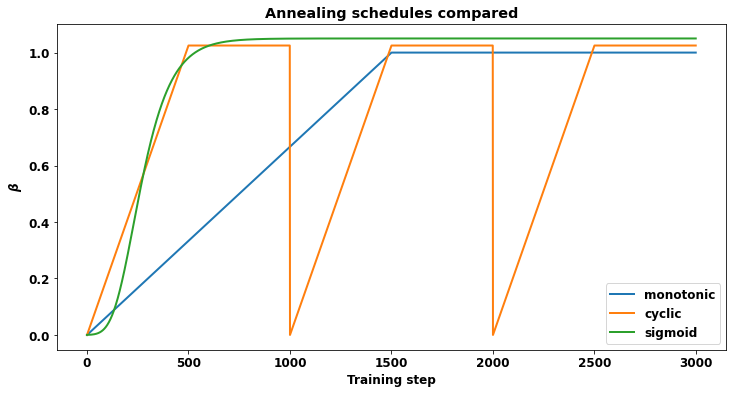

In [8]:
plot_annealing_schedules(3000, 1000)

In [25]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
from uncertify.visualization.plotting import setup_plt_figure

In [18]:
def func(t, a, b, c=1.0):
    return c*(exp(-a*t)-exp(-b*t))

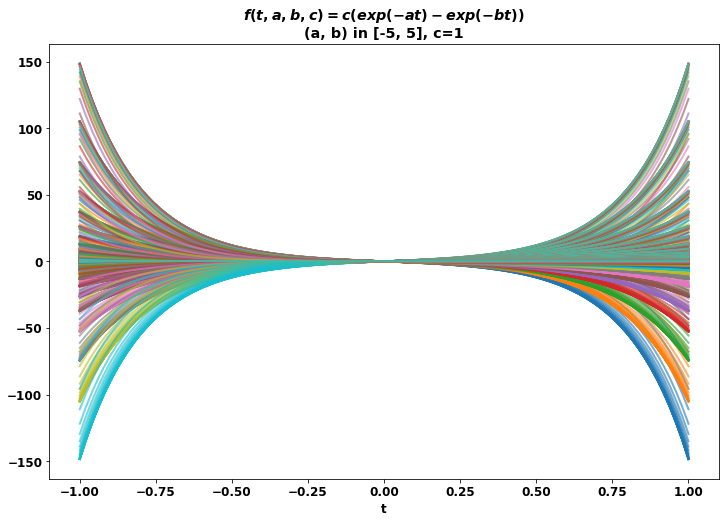

In [54]:
title = f'$f(t, a, b, c)=c(exp(-at)-exp(-bt))$\n(a, b) in [-5, 5], c=1'

fig, ax = setup_plt_figure(figsize=(12, 8), title=title, xlabel='t')

for a in np.linspace(-5, 5, 30):
    for b in np.linspace(-5, 5, 30):
        t_array = np.linspace(-1, 1, 100)
        y_array = [func(t, a, b) for t in t_array]
        ax.plot(t_array, y_array, label=f'a={a}, b={b}', alpha=0.6, linewidth=2)

In [15]:
exp(-2*0.5)-exp(-2*0.5)

0.0